In [1]:
%matplotlib inline
from sympy import *
from pysde import *

import matplotlib.pylab as plt
from matplotlib import rc

In [2]:
x,dx,w,dw,t,dt,a=symbols('x dx w dw t dt a')
x0 =Symbol('x0'); t0 = Symbol('t0')
drift=2*x/(1+t)-a*(1+t)**2;diffusion=a*(1+t)**2
sol=SDE_solver(drift,diffusion,t0,x0)
pprint(sol)   

       2 ⎛              2                2               2     ⎞
(t + 1) ⋅⎝- a⋅t⋅(t₀ + 1)  + a⋅t₀⋅(t₀ + 1)  + a⋅w⋅(t₀ + 1)  + x₀⎠
────────────────────────────────────────────────────────────────
                                   2                            
                           (t₀ + 1)                             


The solution of SDE:
<br>
$$d X_t=-X_t dt+d X_t$$
<br>
is<br>
$$X_t = c e^t +e^t\int^t_{0}e^{-s}d W_s$$


In [3]:
"""
Jan Wehr,  Problems in SDEs, p12,2008
Here a bug,
"""
drift=-x;
diffusion=1.
sol=SDE_solver(drift,diffusion,0,x0)
pprint(sol)  

⎛      ⎛        2⋅t⎞⎞  -t
⎝x₀ + N⎝0, 0.5⋅ℯ   ⎠⎠⋅ℯ  


In [4]:
"""
Jan Wehr,  Problems in SDEs, p14,2008
"""
drift=-x;
diffusion=exp(-t)
sol=SDE_solver(drift,diffusion,0,x0)
pprint(sol)  

          -t
(w + x₀)⋅ℯ  


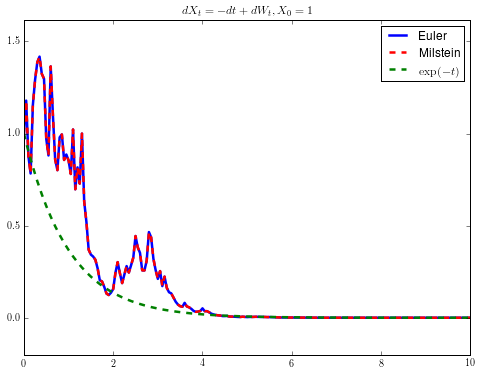

In [5]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

plt.figure(figsize=(8,6))
#plt.xlabel(r'Time $T$',size=14)
#plt.ylabel(r'$X_t$',size=14)
#plt.title(r'$d X_t=-X_t d t+X_t d W_t$',size=14)
plt.ylim(-0.5,1.5)
x0=1.;t0=0.;tn=10.

x,dx=symbols('x dx')

[a,b,c,d]=[0,-1.,0,1.]
drift=a+b*x
diffusion=c+d*x#

nt=200

T= linspace(t0, tn, nt+1)
X=Euler(drift,diffusion,x0,t0,tn,nt)
X,Y=Milstein(drift,diffusion,x0,t0,tn,nt)
plt.plot(T, X, color="blue", linewidth=2.5, linestyle="-", label="Euler")
plt.plot(T, X, color="red", linewidth=2.5, linestyle="--", label="Milstein")
plt.plot(T, np.exp(-T), color="green", linewidth=2.5, linestyle="--", label=r"$\exp(-t)$")

plt.ylim(X.min()-0.2, X.max()+0.2)
plt.title(r"$d X_t=-dt+d W_t,X_0=1$")
plt.legend()
plt.savefig('Milstein.eps')

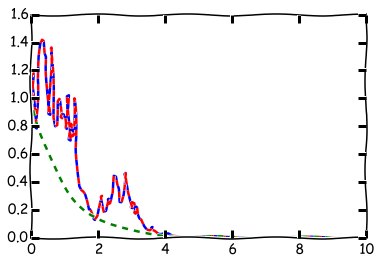

In [6]:
rc('text', usetex=False)
plt.xkcd()

plt.plot(T, X, color="blue", linewidth=2.5, linestyle="-", label="Euler")
plt.plot(T, X, color="red", linewidth=2.5, linestyle="--", label="Milstein")
plt.plot(T, np.exp(-T), color="green", linewidth=2.5, linestyle="--", label=r"$\exp(-t)$")

#Kolmogorov Forward Equation:

$$\frac{\partial f}{\partial t} = \frac{\partial \mu(x)f(t,x)}{\partial x} +\frac{\partial^2 (\sigma^2(x)f(x,t))}{\partial x^2}$$

(**Wright's Formula:** Stationary solution)

$$ f(x)=\frac{\phi}{\sigma^2}\cdot \exp\left({\int^x\frac{\mu(s)}{\sigma^2(s)}d s}\right) $$

where $\phi$ is chosen so as to make $\int^{\infty}_{-\infty}f(x) d x=1$

In [8]:
x,dx=symbols('x dx')
r,G,e,d=symbols('r G epsilon delta')

print("The pdf is of X which satisfies dX = r*(G-X) dt + e dW is:")
pprint (sde.KolmogorovFE_Spdf(r*(G-x),e))
print ("\nThe pdf is of X which satisfies dX = r*(G-X) dt + e*X dW is:")
pprint (sde.KolmogorovFE_Spdf(r*(G-x),e*x,0,oo))
l=sde.KolmogorovFE_Spdf(r*(G-x),e*x*(1-x),0,1)
print ("\nThe pdf is of X which satisfies dX = r*(G-X) dt + e*X*(1-X) dW is:")
pprint (l.subs({e:r*d}))

The pdf is of X which satisfies dX = r*(G-X) dt + e dW is:
         ⎛   2              ⎞
       r⋅⎝- G  + x⋅(2⋅G - x)⎠
       ──────────────────────
  ___           2⋅ε          
╲╱ 2 ⋅ℯ                      
─────────────────────────────
                   ___       
           ___    ╱ ε        
       2⋅╲╱ π ⋅  ╱  ─        
               ╲╱   r        

The pdf is of X which satisfies dX = r*(G-X) dt + e*X dW is:
                 -r⋅x 
            G⋅r  ─────
 G⋅r - 1 ⎛ε⎞       ε  
x       ⋅⎜─⎟   ⋅ℯ     
         ⎝r⎠          
──────────────────────
        Γ(G⋅r)        

The pdf is of X which satisfies dX = r*(G-X) dt + e*X*(1-X) dW is:
 G               G       1     
 ─ - 1         - ─ - 1 + ─     
 δ               δ       δ  ⎛1⎞
x     ⋅(-x + 1)           ⋅Γ⎜─⎟
                            ⎝δ⎠
───────────────────────────────
             ⎛  ⎛     1⎞⎞      
             ⎜G⋅⎜-1 + ─⎟⎟      
        ⎛G⎞  ⎜  ⎝     G⎠⎟      
       Γ⎜─⎟⋅Γ⎜──────────⎟      
        ⎝δ⎠  ⎝    δ     ⎠     

##Type: 

$$d X_t = \gamma \left( t, X_t \right) d t + b \left( t \right) X_t d W_t$$

Define

$$Y_t \left( \omega \right) = F_t \left( \omega \right) X_t \left( \omega \right)$$


where integrating factor


$$F_t = \exp \left( - \int^t_0 b \left( s \right) d W_t + \frac{1}{2} \int^t_0 b^2 \left( s \right) d s \right)$$



Then $Y_t \left( \omega \right)$ satisfies the solution



$$\begin{aligned} 
\frac{d Y_t \left( \omega \right)}{d t} &= &F_t \left( \omega \right) \cdot \gamma \left( t, F^{- 1}_t \left( \omega \right) Y_t \left( \omega \right) \right),  \cr 
Y_0 &=& x 
\end{aligned}$$


and $X_t = F^{- 1}_t Y_t$.

In [11]:
W =Symbol("W")
X = Function("X")(W)


a,b=symbols("a b")
A=a*t/X
B=b*X
sol=Reduce2(A,B)

print ("The solution is of dX = %s dt + %s dW is:" %(A,B))
pprint(sol)

The solution is of dX = a*t/X(W) dt + b*X(W) dW is:
                                                    2  
            _______________________________        b ⋅t
           ╱      ⌠                          W⋅b - ────
   ___    ╱       ⎮      b⋅(-2⋅W + b⋅t)             2  
-╲╱ 2 ⋅  ╱   C₁ + ⎮ a⋅t⋅ℯ               dt ⋅ℯ          
       ╲╱         ⌡                                    
